Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

Load dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/python data science course materials/heart.csv")

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Data Cleaning

Check for missing values and clean data

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df = df.apply(pd.to_numeric)

Features and target variable

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

Data Preprocessing

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-test split: 80% train and 20% test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Selection

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

Hyperparameter tuning with Grid Search CV for each model

In [ ]:
best_estimators = {}
for name, model in models.items():
    if name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1, 10, 100]}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    elif name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

Model Evaluation and Selection

In [ ]:
best_model = None
best_score = 0

for name, model in best_estimators.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    print(f"{name} - Cross-Validated F1 Score: {cv_score:.3f}")
    if cv_score > best_score:
        best_score = cv_score
        best_model = model

Logistic Regression - Cross-Validated F1 Score: 0.811
Random Forest - Cross-Validated F1 Score: 0.773
SVM - Cross-Validated F1 Score: 0.813


Final Evaluation on Test Set

In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

Metrics for classification

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nBest Model:", best_model)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Best Model: SVC(C=0.1)
Accuracy: 0.900
Precision: 0.875
Recall: 0.875
F1 Score: 0.875


Confusion Matrix:

Provides insight into how well the model classified each category.

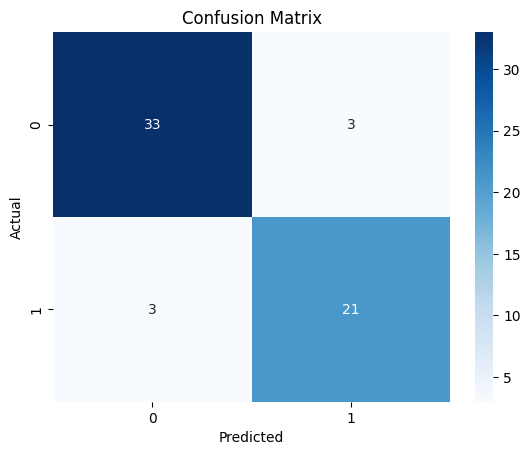

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Prediction on New Data (Here we’ll use a random sample from X_test for demonstration)

In [ ]:
new_data = X_test[0].reshape(1, -1)  # Taking the first instance from X_test
pred = best_model.predict(new_data)
print("Prediction for new data:", "Heart Disease" if pred[0] == 1 else "No Heart Disease")

Prediction for new data: No Heart Disease
